# Generate figure 3
Figure 3 describes the results of all of our ART driven DBTL cycles.

- 3A: Schematic of ART process (not included here)
- 3B: Titer violin plot
- 3C: Normalized dCas9 violin plot
- 3D: % of strains passing filters
Other information:
- ART performance per cycle
- Identity of best strains
- Proteomics clustering

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error
from utils import set_plot_config

plot_config, palette = set_plot_config(return_configs=True)

In [2]:
df = pd.read_csv('df_target_all_TEST.csv', index_col = 0)
df
df['line_name_cycle'] = df.apply(lambda x: f"{x['line_name_norep']}-C{x['cycle']}" , axis = 1)

In [3]:
logical_list_loop = []
for single_line_name in df['Line Name']:
    logical_list_loop.append('PP_1506' in single_line_name)

In [4]:
logical_list_comprehension = ['PP_1506' in single_line_name for single_line_name in df['Line Name']]

<Axes: xlabel='number_of_grna', ylabel='isoprenol'>

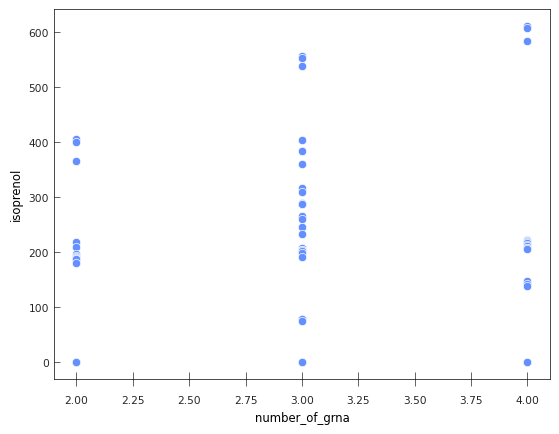

In [5]:
sns.scatterplot(
    data=df.loc[(
        (np.array(['PP_1506' in single_line_name for single_line_name in df['Line Name']])) & 
        (df['cycle'] == 6))
    ,:
    ],
    x ='number_of_grna',
    y = 'isoprenol'
)

<Axes: xlabel='number_of_grna', ylabel='isoprenol'>

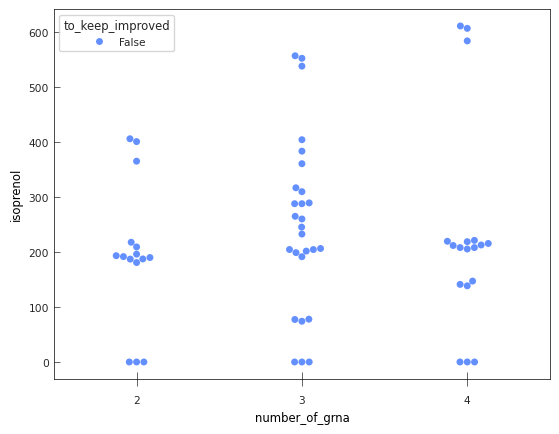

In [6]:
sns.swarmplot(
    data=df.loc[(
        (np.array(['PP_1506' in single_line_name for single_line_name in df['Line Name']])) & 
        (df['cycle'] == 6))
    ,:
    ],
    x ='number_of_grna',
    y = 'isoprenol',
    hue = 'to_keep_improved'
)

In [7]:
# np.where(
#     df.loc[df['has_1506'], [f'target_{i}' for i in [1,2,3,4]]] == 'PP_1506')


In [8]:
df['has_1506'] = ['PP_1506' in single_line_name for single_line_name in df['Line Name']]
df.loc[df['has_1506'], '1506_position'] = np.where(
    df.loc[df['has_1506'], [f'target_{i}' for i in [1,2,3,4]]] == 'PP_1506')[1]

In [9]:
df['1506_downreg'] = None
for idx, row in df[df['has_1506']].iterrows():
    current_target_location = row['1506_position']
    column_to_look_at = f'target_{int(current_target_location+1)}_norm'
    df.loc[idx, '1506_downreg'] = row[column_to_look_at]

In [10]:
df[df['has_1506']]

,Line Name,cycle,is_control,line_name_norep,number_of_grna,isoprenol,dCas9,dCas9_normtocontrol,target_1,target_2,...,target_4_belowthresh,all_targets_belowthresh,all_reps_belowthresh,all_reps_above_dcas9_thresh,to_keep,to_keep_improved,line_name_cycle,has_1506,1506_position,1506_downreg
147,PP_1506-R1,0,False,PP_1506,1,253.56809,457897.03,0.057945,PP_1506,NaN,...,False,False,False,False,NaN,True,PP_1506-C0,True,0.0,0.596278
148,PP_1506-R2,0,False,PP_1506,1,225.75831,322219.78,0.040776,PP_1506,NaN,...,False,False,False,False,NaN,True,PP_1506-C0,True,0.0,0.67079
149,PP_1506-R3,0,False,PP_1506,1,221.39902,617702.20,0.078168,PP_1506,NaN,...,False,False,False,False,NaN,True,PP_1506-C0,True,0.0,0.628637
423,PP_0658_PP_1506_PP_3071-R1,1,False,PP_0658_PP_1506_PP_3071,3,175.38490,3266427.50,0.377428,PP_0658,PP_1506,...,False,False,False,True,0.0,False,PP_0658_PP_1506_PP_3071-C1,True,1.0,0.995704
431,PP_0658_PP_1506_PP_3071-R2,1,False,PP_0658_PP_1506_PP_3071,3,182.48860,4104907.62,0.474313,PP_0658,PP_1506,...,False,False,False,True,0.0,False,PP_0658_PP_1506_PP_3071-C1,True,1.0,1.006043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,PP_0813_PP_0815_PP_1506-R2,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,669708.80,0.044699,PP_0813,PP_0815,...,False,False,False,False,0.0,False,PP_0813_PP_0815_PP_1506-C6,True,2.0,2.562674
1502,PP_0813_PP_0815_PP_1506-R3,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,476134.40,0.031779,PP_0813,PP_0815,...,False,False,False,False,0.0,False,PP_0813_PP_0815_PP_1506-C6,True,2.0,2.546653
1503,PP_1506_PP_4120-R1,6,False,PP_1506_PP_4120,2,0.00000,0.00,0.000000,PP_1506,PP_4120,...,False,False,False,False,0.0,False,PP_1506_PP_4120-C6,True,0.0,0.604514
1504,PP_1506_PP_4120-R2,6,False,PP_1506_PP_4120,2,0.00000,0.00,0.000000,PP_1506,PP_4120,...,False,True,False,False,0.0,False,PP_1506_PP_4120-C6,True,0.0,0.452216


<Axes: xlabel='isoprenol', ylabel='1506_downreg'>

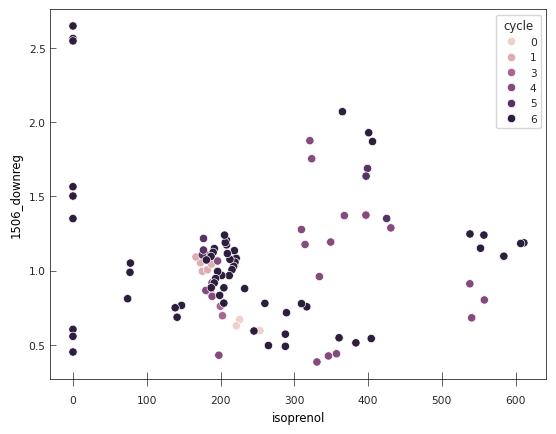

In [11]:
sns.scatterplot(
    df[df['has_1506']],
    x = 'isoprenol',
    y = '1506_downreg',
    hue = 'cycle'
)

<Axes: xlabel='cycle', ylabel='1506_downreg'>

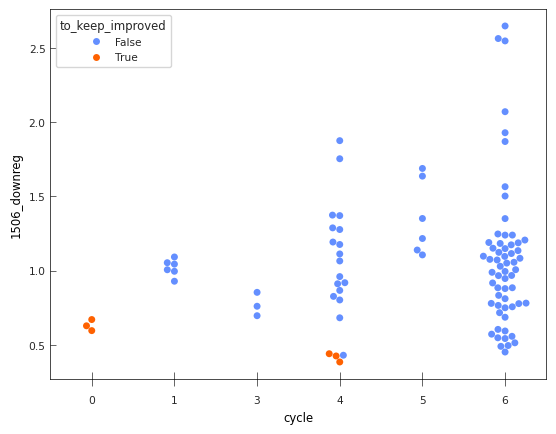

In [12]:
sns.swarmplot(
    df[df['has_1506']],
    x = 'cycle',
    y = '1506_downreg',
    hue = 'to_keep_improved'
)

<Axes: xlabel='1506_downreg', ylabel='Count'>

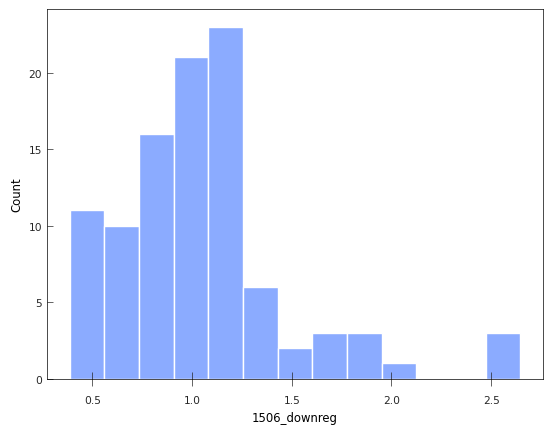

In [13]:
sns.histplot(
    df[df['has_1506']],
    x = '1506_downreg'
)
    

In [14]:
df.loc[df['has_1506'], [f'target_{i}' for i in [1,2,3,4]]]

,target_1,target_2,target_3,target_4
147,PP_1506,NaN,NaN,NaN
148,PP_1506,NaN,NaN,NaN
149,PP_1506,NaN,NaN,NaN
423,PP_0658,PP_1506,PP_3071,NaN
431,PP_0658,PP_1506,PP_3071,NaN
...,...,...,...,...
1501,PP_0813,PP_0815,PP_1506,NaN
1502,PP_0813,PP_0815,PP_1506,NaN
1503,PP_1506,PP_4120,NaN,NaN
1504,PP_1506,PP_4120,NaN,NaN


In [15]:
df.loc[df['has_1506'], [f'target_{i}' for i in [1,2,3,4]]] == 'PP_1506'

,target_1,target_2,target_3,target_4
147,True,False,False,False
148,True,False,False,False
149,True,False,False,False
423,False,True,False,False
431,False,True,False,False
...,...,...,...,...
1501,False,False,True,False
1502,False,False,True,False
1503,True,False,False,False
1504,True,False,False,False


In [16]:
df.loc[
(np.array(['PP_1506' in single_line_name for single_line_name in df['Line Name']])) & 
(df['cycle'] == 6)
, :
]


,Line Name,cycle,is_control,line_name_norep,number_of_grna,isoprenol,dCas9,dCas9_normtocontrol,target_1,target_2,...,target_4_belowthresh,all_targets_belowthresh,all_reps_belowthresh,all_reps_above_dcas9_thresh,to_keep,to_keep_improved,line_name_cycle,has_1506,1506_position,1506_downreg
1339,PP_0812_PP_0813_PP_0815_PP_1506-R1,6,False,PP_0812_PP_0813_PP_0815_PP_1506,4,611.1875,8670414.40,0.578703,PP_0812,PP_0813,...,False,False,False,True,1.0,False,PP_0812_PP_0813_PP_0815_PP_1506-C6,True,3.0,1.187255
1340,PP_0812_PP_0813_PP_0815_PP_1506-R3,6,False,PP_0812_PP_0813_PP_0815_PP_1506,4,606.8789,8941632.80,0.596806,PP_0812,PP_0813,...,False,False,False,True,1.0,False,PP_0812_PP_0813_PP_0815_PP_1506-C6,True,3.0,1.183079
1343,PP_0812_PP_0813_PP_0815_PP_1506-R2,6,False,PP_0812_PP_0813_PP_0815_PP_1506,4,584.0290,10354285.10,0.691092,PP_0812,PP_0813,...,False,False,False,True,1.0,False,PP_0812_PP_0813_PP_0815_PP_1506-C6,True,3.0,1.097274
1345,PP_0812_PP_0815_PP_1506-R3,6,False,PP_0812_PP_0815_PP_1506,3,557.0017,7638335.60,0.509818,PP_0812,PP_0815,...,False,False,False,True,1.0,False,PP_0812_PP_0815_PP_1506-C6,True,2.0,1.239538
1346,PP_0812_PP_0815_PP_1506-R1,6,False,PP_0812_PP_0815_PP_1506,3,552.4389,7028652.40,0.469124,PP_0812,PP_0815,...,False,False,False,True,1.0,False,PP_0812_PP_0815_PP_1506-C6,True,2.0,1.150925
1348,PP_0812_PP_0815_PP_1506-R2,6,False,PP_0812_PP_0815_PP_1506,3,538.1355,10596137.10,0.707235,PP_0812,PP_0815,...,False,False,False,True,1.0,False,PP_0812_PP_0815_PP_1506-C6,True,2.0,1.246837
1372,PP_0812_PP_1506-R1,6,False,PP_0812_PP_1506,2,406.0365,9691139.50,0.646831,PP_0812,PP_1506,...,False,False,False,True,0.0,False,PP_0812_PP_1506-C6,True,1.0,1.869301
1373,PP_0815_PP_1506_PP_4189-R3,6,False,PP_0815_PP_1506_PP_4189,3,404.3060,27225159.10,1.817132,PP_0815,PP_1506,...,False,False,False,True,1.0,False,PP_0815_PP_1506_PP_4189-C6,True,1.0,0.542987
1375,PP_0812_PP_1506-R2,6,False,PP_0812_PP_1506,2,400.8658,9573343.00,0.638969,PP_0812,PP_1506,...,False,False,False,True,0.0,False,PP_0812_PP_1506-C6,True,1.0,1.928576
1381,PP_0815_PP_1506_PP_4189-R1,6,False,PP_0815_PP_1506_PP_4189,3,383.4839,20172558.00,1.346409,PP_0815,PP_1506,...,False,False,False,True,1.0,False,PP_0815_PP_1506_PP_4189-C6,True,1.0,0.514071


In [17]:
cycle_labels = [
    'DBTL0: Initial cycle',
    'DBTL1: Pseudorandom\n2x and 3x combinations',
    'DBTL2: ART designs\nfrom DBTL0-1',
    'DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid',
    'DBTL4: ART designs\nfrom DBTL3',
    'DBTL5: ART designs\nfrom DBTL3-4',
    'DBTL6: ART designs\nfrom DBTL3-5'
]

cycle_labels_thin = [    
    'DBTL0: Initial\ncycle',
    'DBTL1: Pseudo-\nrandom 2x and 3x\ncombinations',
    'DBTL2:\nART designs\nfrom DBTL0-1',
    'DBTL3: DBTL2 repeat\nwith improved dCas9\nplasmid',
    'DBTL4:\nART designs\nfrom DBTL3',
    'DBTL5:\nART designs\nfrom DBTL3-4',
    'DBTL6:\nART designs\nfrom DBTL3-5'
]
cycle_label_dict = {i:cycle_labels[i] for i in [0,1,2,3,4,5,6]}
cycle_label_dict_thin = {i:cycle_labels_thin[i] for i in [0, 1, 2, 3, 4, 5, 6]}
df['cycle_label'] = df['cycle'].apply(lambda x: cycle_label_dict[x])

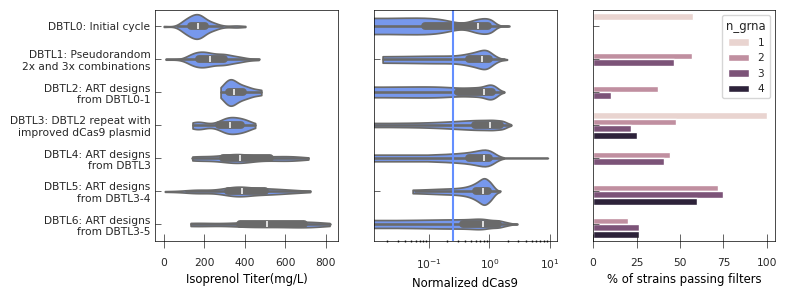

In [18]:
fig, ax = plt.subplots(
    ncols=3,
    nrows=1,
    figsize = (8, 3),
    sharey = True
)

# sns.violinplot(
#     data=df[df['to_keep_improved']],
#     x = 'isoprenol',
#     y = 'cycle_label',
#     orient = 'h',
#     cut = 0,
#     ax = ax[0],
# )

sns.violinplot(
    data=df[(df['to_keep_improved']) & (df['cycle'] >-1)],
    x = 'isoprenol',
    y = 'cycle_label',
    orient = 'h',
    cut = 0,
    ax = ax[0],
)


sns.violinplot(data = df,
    x = 'dCas9_normtocontrol',
    y = 'cycle_label',
    orient = 'h',
    cut = 0,
    ax = ax[1],
)           
ax[1].set_xscale('log')
ax[1].axvline(0.25)

cycle_list = []
n_grna_list = []
n_passing_list = []
n_total_list = []
for cycle in df['cycle'].unique():
    dfc = df[(df['cycle'] == cycle) & ~(df['is_control'])]
    for n in dfc['number_of_grna'].unique():
        n_passing = sum(dfc.loc[(dfc['number_of_grna'] == n), 'to_keep_improved'])
        n_total = len(dfc.loc[(dfc['number_of_grna'] == n), 'to_keep_improved'])
        cycle_list.append(cycle)
        n_grna_list.append(n)
        n_passing_list.append(n_passing)
        n_total_list.append(n_total)
df_pct_passing = pd.DataFrame.from_dict(
    {
        'cycle': cycle_list,
        'n_grna': n_grna_list,
        'n_passing': n_passing_list,
        'n_total': n_total_list
    }
)
df_pct_passing['pct_passing'] = 100 * df_pct_passing['n_passing']/df_pct_passing['n_total']
df_pct_passing['cycle_label'] = df_pct_passing['cycle'].apply(lambda x: cycle_label_dict[x])
sns.barplot(
    data = df_pct_passing,
    x = 'pct_passing', 
    y = 'cycle_label',
    hue = 'n_grna',
    orient='h'
)
ax[0].set_ylabel('')

x_labels = [
    'Isoprenol Titer(mg/L)',
    'Normalized dCas9',
    '% of strains passing filters'
]
for a, xl in zip(ax, x_labels):
    a.set_xlabel(xl)

In [19]:
df_pct_passing

,cycle,n_grna,n_passing,n_total,pct_passing,cycle_label
0,0,1,216,375,57.600000,DBTL0: Initial cycle
1,1,3,42,90,46.666667,DBTL1: Pseudorandom\n2x and 3x combinations
2,1,2,51,90,56.666667,DBTL1: Pseudorandom\n2x and 3x combinations
3,2,4,0,15,0.000000,DBTL2: ART designs\nfrom DBTL0-1
4,2,3,9,90,10.000000,DBTL2: ART designs\nfrom DBTL0-1
5,2,2,27,72,37.500000,DBTL2: ART designs\nfrom DBTL0-1
6,3,3,15,69,21.739130,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
7,3,2,36,75,48.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
8,3,4,3,12,25.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
9,3,1,6,6,100.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid


In [20]:
art_folders = [
    'dbtl1_art_outputs/',
    'dbtl2_art_outputs/',
    'dbtl3ONLY_art_outputs/',
    'dbtl4_art_outputs/',
    'dbtl5_art_outputs/',
    'dbtl6_art_outputs/'
]

In [21]:
art_cycles = [1,2,3,4,5,6]
art_folders = [f'dbtl{i}_art_outputs/' for i in art_cycles]
art_folders[2] = 'dbtl3ONLY_art_outputs/'
df_column = '$R^2$'
df_row = 'Ensemble Model'
art_perf_df = pd.DataFrame.from_dict(
    {
        'folder': art_folders,
        'cycle': art_cycles,
        'name': [f'DBTL{i}' for i in art_cycles],
    }
)
art_perf_df[['r2', 'cv_r2']] = None
for idx, srs in art_perf_df.iterrows():
    if srs['cycle']==3:
        r2_df = pd.read_csv(f"{srs['folder']}metric0.csv", index_col = 0)
        r2_cv_df = pd.read_csv(f"{srs['folder']}cv_metric0.csv", index_col = 0)
    else:
        r2_df = pd.read_csv(f"{srs['folder']}metric_isoprenol.csv", index_col = 0)
        r2_cv_df = pd.read_csv(f"{srs['folder']}cv_metric_isoprenol.csv", index_col = 0)

    art_perf_df.loc[idx, 'Full'] = r2_df.loc[df_row, df_column]
    art_perf_df.loc[idx, '5-fold CV'] = r2_cv_df.loc[df_row, df_column]
art_perf_df_melt = pd.melt(art_perf_df, id_vars = 'name', value_vars = ['Full', '5-fold CV'],var_name='Dataset' )
art_perf_df_melt

,name,Dataset,value
0,DBTL1,Full,0.904311
1,DBTL2,Full,0.908956
2,DBTL3,Full,0.956492
3,DBTL4,Full,0.886727
4,DBTL5,Full,0.937853
5,DBTL6,Full,0.892261
6,DBTL1,5-fold CV,0.043039
7,DBTL2,5-fold CV,0.552922
8,DBTL3,5-fold CV,0.408193
9,DBTL4,5-fold CV,0.584166


Text(0, 0.5, '')

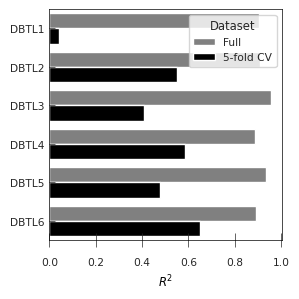

In [22]:
fig, ax = plt.subplots(figsize = (3,3))
sns.barplot(data = art_perf_df_melt, 
            y = 'name',
            x = 'value',
            hue = 'Dataset',
            palette=['gray', 'black']
           )
ax.set_xlabel(r'$R^2$')
ax.set_ylabel('')


## Plot ART performance

In [23]:
dbtl6_art_df = pd.read_csv('./dbtl6_art_outputs/art_performance_df_plotting.csv', index_col = 0)
dbtl6_art_df.head(3)

,true,pred,pred_cv,pred_cv_std
0,164.5141,184.757484,313.468952,75.805053
1,144.8960,184.757484,313.468952,75.805053
2,141.9620,184.757484,313.468952,75.805053


## Set up full figure

In [24]:
image_location = './Figure 3A v1.png'
img = plt.imread(image_location)


# UPDATE THE PROPORTIONS OF THE FIGURE TO MATCH THE ILLUSTRATOR DIAGRAM

In [25]:
df_pct_passing

,cycle,n_grna,n_passing,n_total,pct_passing,cycle_label
0,0,1,216,375,57.600000,DBTL0: Initial cycle
1,1,3,42,90,46.666667,DBTL1: Pseudorandom\n2x and 3x combinations
2,1,2,51,90,56.666667,DBTL1: Pseudorandom\n2x and 3x combinations
3,2,4,0,15,0.000000,DBTL2: ART designs\nfrom DBTL0-1
4,2,3,9,90,10.000000,DBTL2: ART designs\nfrom DBTL0-1
5,2,2,27,72,37.500000,DBTL2: ART designs\nfrom DBTL0-1
6,3,3,15,69,21.739130,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
7,3,2,36,75,48.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
8,3,4,3,12,25.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid
9,3,1,6,6,100.000000,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid


In [26]:
df.columns

Index(['Line Name', 'cycle', 'is_control', 'line_name_norep', 'number_of_grna',
       'isoprenol', 'dCas9', 'dCas9_normtocontrol', 'target_1', 'target_2',
       'target_3', 'target_4', 'target_1_value', 'target_2_value',
       'target_3_value', 'target_4_value', 'target_1_control',
       'target_2_control', 'target_3_control', 'target_4_control',
       'target_1_norm', 'target_2_norm', 'target_3_norm', 'target_4_norm',
       'has_missing_control', 'above_dcas9_thresh', 'target_1_belowthresh',
       'target_2_belowthresh', 'target_3_belowthresh', 'target_4_belowthresh',
       'all_targets_belowthresh', 'all_reps_belowthresh',
       'all_reps_above_dcas9_thresh', 'to_keep', 'to_keep_improved',
       'line_name_cycle', 'has_1506', '1506_position', '1506_downreg',
       'cycle_label'],
      dtype='object')

In [27]:
count_df = pd.DataFrame.from_dict(
    {
        'cycle_label': df['cycle_label'].unique()
    }
)
for cl in count_df['cycle_label'].unique():
    print(cl)
    reps_above_thresh = df.loc[df['cycle_label'] == cl,
                'all_reps_above_dcas9_thresh'].sum()
    total_strains = len(df.loc[df['cycle_label'] == cl,
                'all_reps_above_dcas9_thresh'])
    failing_strains = total_strains - reps_above_thresh
    count_df.loc[count_df['cycle_label'] == cl, '% below dCas9 Thresh'] = (100*failing_strains/total_strains)
                                        
count_df

DBTL0: Initial cycle
DBTL1: Pseudorandom
2x and 3x combinations
DBTL2: ART designs
from DBTL0-1
DBTL3: DBTL2 repeat with
improved dCas9 plasmid
DBTL4: ART designs
from DBTL3
DBTL5: ART designs
from DBTL3-4
DBTL6: ART designs
from DBTL3-5


,cycle_label,% below dCas9 Thresh
0,DBTL0: Initial cycle,35.877863
1,DBTL1: Pseudorandom\n2x and 3x combinations,15.625000
2,DBTL2: ART designs\nfrom DBTL0-1,33.333333
3,DBTL3: DBTL2 repeat with\nimproved dCas9 plasmid,17.241379
4,DBTL4: ART designs\nfrom DBTL3,21.311475
5,DBTL5: ART designs\nfrom DBTL3-4,9.677419
6,DBTL6: ART designs\nfrom DBTL3-5,25.396825


In [28]:
def add_schematic_3A(ax = None, image_location = './Figure 3A v1.png'):
    if ax is None:
        fig, ax = plt.subplots()
    img = plt.imread(image_location)
    ax.imshow(img)
    ax.set_axis_off()

    
def add_titer_violin(df, ax = None, overlay = None):
    if ax is None:
        fig, ax = plt.subplots()
    overlay_options = ['mean_only', None, 'box', 'quart', 'point', 'stick']
    assert overlay in overlay_options, f'ERROR: overlay type {overlay} is not allowed. Options are: {overlay_options}'
    add_violin_mean = False
    if overlay == 'mean_only':
        add_violin_mean = True
        overlay = None
        
    #Update column names and contents for filtering
    df = df.rename(columns = {'to_keep_improved': 'Filter'})
    df['Filter'] = ['Pass' if x else 'Fail' for x in df['Filter']]
    
    vp = sns.violinplot(
        data=df[~df['is_control']],
        x = 'isoprenol',
        y = 'cycle_label',
        orient = 'h',
        cut = 0,
        ax = ax,
        hue = 'Filter',
        inner = overlay, 
        hue_order = ['Pass', 'Fail'],
        palette = palette[:2],
    )
    
    if add_violin_mean:
        mean_df = df.loc[
                ~df['is_control'], ['Filter', 'isoprenol', 'cycle','cycle_label']
            ].groupby(['Filter', 'cycle', 'cycle_label']).mean()
        sns.boxplot(
            data = mean_df,
            x = 'isoprenol',
            y = 'cycle_label',
            hue = 'Filter',
            orient = 'h',
            # palette = [to_rgba(hex_color) for hex_color in palette[:2]],
            palette = palette[:2],
            ax = vp,
            legend=None,
            hue_order = ['Pass', 'Fail']
        )
    # ax.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh', '3'])
    control_mean = df.loc[df['is_control'], 'isoprenol'].mean()
    ax.axvline(control_mean, c = 'k', linestyle = '--', label = 'Control\nMean')
    ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]*1.1])
    ax.legend()
    ax.set_xlabel('Titer (mg/L)')
    ax.set_title('Isoprenol Titer in passing\nand failing strains')
    ax.set_ylabel('')
    
    
def add_dcas9_violin(df, ax = None):
    sns.violinplot(data = df,
        x = 'dCas9_normtocontrol',
        y = 'cycle_label',
        orient = 'h',
        cut = 0,
        ax = ax,
    )  
    ax.set_xlabel('Normalized dCas9 counts')
    ax.set_title('dCas9 counts')
    ax.axvline(0.25, c = 'k', linestyle = '--', label = 'dCas9\nfilter')
    # ax.set_yticklabels([])
    ax.legend()
    ax.tick_params(labelleft=False)
    ax.set_ylabel('')
    
def add_dcas9_pctbar(df, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    
    count_df = pd.DataFrame.from_dict(
        {
            'cycle_label': df['cycle_label'].unique()
        }
    )
    for cl in count_df['cycle_label'].unique():
        print(cl)
        reps_above_thresh = df.loc[df['cycle_label'] == cl,
                    'all_reps_above_dcas9_thresh'].sum()
        total_strains = len(df.loc[df['cycle_label'] == cl,
                    'all_reps_above_dcas9_thresh'])
        failing_strains = total_strains - reps_above_thresh
        count_df.loc[count_df['cycle_label'] == cl, '% below dCas9 Thresh'] = (100*failing_strains/total_strains)    
        
    sns.barplot(data = count_df,
        x = '% below dCas9 Thresh',
        y = 'cycle_label',
        orient = 'h',
        ax = ax,
    )  
    ax.set_xlabel('% of strains with\ninsufficient dCas9')
    ax.set_title('dCas9 filter')
    # ax.axvline(0.25, c = 'k', linestyle = '--', label = 'dCas9\nfilter')
    # ax.set_yticklabels([])
    # ax.legend()
    ax.set_xlim([0, 50])
    ax.tick_params(labelleft=False)
    ax.set_ylabel('')
    
def add_filter_bargraph(ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.barplot(
        data = df_pct_passing.rename(columns = {'n_grna': '# gRNA'}),
        x = 'pct_passing', 
        y = 'cycle_label',
        hue = '# gRNA',
        orient='h',
        ax = ax,
        palette= palette
    )
    # ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.tick_params(labelleft = False)
    ax.set_title('Filter passage\nby number of gRNA')
    ax.set_xlabel('% Passing')

def add_art_performance_bargraph(art_df, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.barplot(data = art_perf_df_melt, 
                y = 'name',
                x = 'value',
                hue = 'Dataset',
                palette=['gray', 'black'],
                ax = ax
               )
    ax.set_xlabel(r"$R^2$")
    ax.set_ylabel('')
    ax.set_xlim([0, 1])
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,
    )
    
def add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = False, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    if cv:
        y_col = 'pred_cv'
        y_label = 'Cross Validated\nPred. Isoprenol (mg/L)'
        title_prefix = 'DBTL3-6 - Cross-validation:\n'
    else:
        y_col = 'pred'
        y_label = 'Pred. Isoprenol (mg/L)'
        title_prefix = 'DBTL3-6 - Final Model:\n'

        
    sns.scatterplot(
        data = perf_df,
        x = 'true', 
        y = y_col,
        alpha = 0.4,
        ax = ax
    )
    
    ax.set_xlabel('Measured Isoprenol (mg/L)')
    ax.set_ylabel(y_label)
    
    min_axlim = np.min(ax.get_xlim() + ax.get_ylim())
    max_axlim = np.max(ax.get_xlim() + ax.get_ylim())
    
    ax.set_xlim([min_axlim, max_axlim])
    ax.set_ylim([min_axlim, max_axlim])
    
    ax.axline((min_axlim, min_axlim), slope = 1, c = 'k', linestyle = '--')
    if title_stat:
        r2 = r2_score(perf_df['true'], perf_df[y_col])
        mae = mean_absolute_error(perf_df['true'], perf_df[y_col])
        subtext = f'= {r2:.2f}, MAE = {mae:.2f} mg/L'
        title_text = title_prefix + r'$R^2$ ' + subtext
        ax.set_title(title_text)
            
    


### Run each function independently

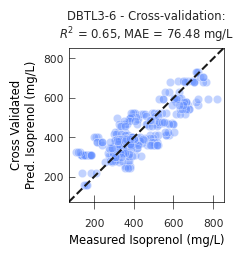

In [29]:
fig, ax = plt.subplots(figsize = (2, 2))
add_art_parity_plot(ax=ax, cv = True, title_stat=True)

Define proportions for figure

In [30]:
fig_h = 10.5
fig_w = 8

schematic = plt.imread('./Figure 3A v1.png')
schematic.shape
scheme_h, scheme_w = schematic.shape[:2]

scheme_ax_w = 0.95
scheme_ax_h = scheme_ax_w * fig_w * scheme_h/scheme_w * 1/fig_h


## Bottom row of figures:
bottom_row_bottom = 0.05
bottom_row_left = 0.1
bottom_row_height = 0.15

perf_bargraph_width = 0.2

perf_scatter_cv_left = perf_bargraph_width + bottom_row_left + 0.1
perf_scatter_cv_width = 0.2

perf_scatter_left = perf_scatter_cv_left + perf_scatter_cv_width + 0.1
perf_scatter_width = 0.2

## middle row of figures

middle_row_bottom = bottom_row_height + 0.05
middle_row_left = 0.25
middle_row_height = 0.25







DBTL0: Initial cycle
DBTL1: Pseudorandom
2x and 3x combinations
DBTL2: ART designs
from DBTL0-1
DBTL3: DBTL2 repeat with
improved dCas9 plasmid
DBTL4: ART designs
from DBTL3
DBTL5: ART designs
from DBTL3-4
DBTL6: ART designs
from DBTL3-5
0.05 0.9877822843122528
0.21 0.5700000000000001
0.46 0.5700000000000001
0.71 0.5700000000000001
0.060000000000000005 0.22
0.36000000000000004 0.22
0.66 0.22


/tmp/ipykernel_6831/2252973426.py:114: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


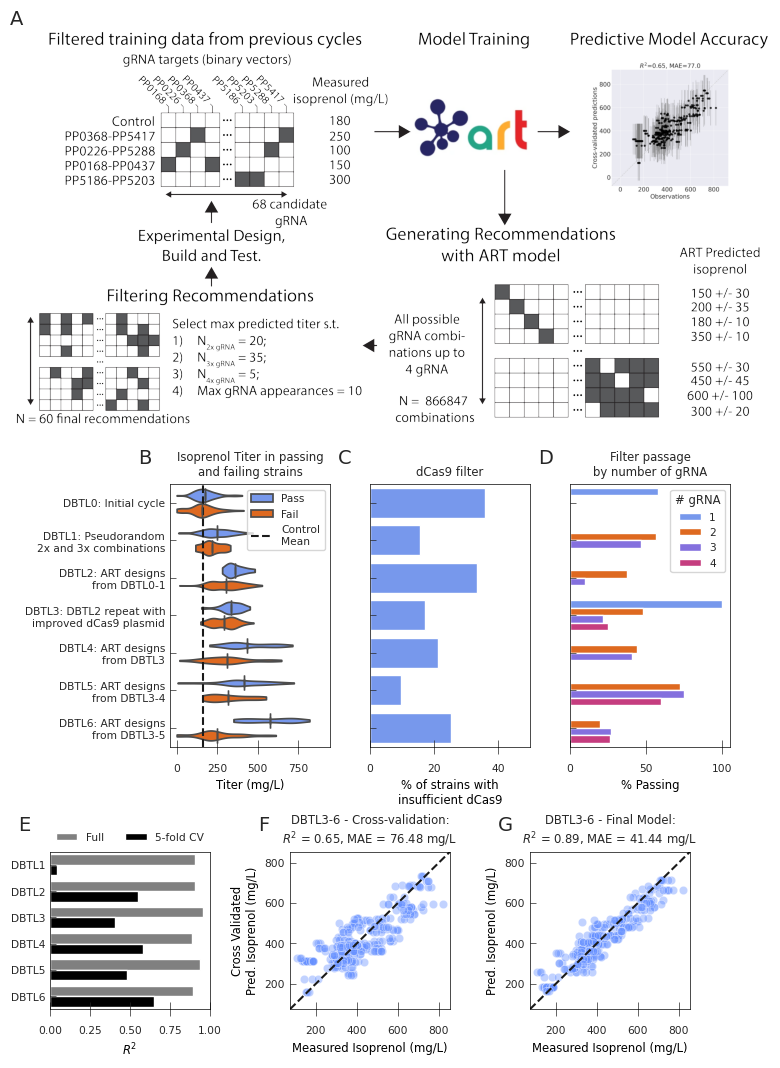

In [31]:
#Create full figure
f = plt.figure(figsize = (8, 10.5))
#Add axis for the schematic
ax_schematic = f.add_axes(
    rect = (0.05, .6, scheme_ax_w, scheme_ax_h), #left, bottom, width, height
    frameon = False
)
add_schematic_3A(ax_schematic)

#Add axes for other figure
ax_titer = f.add_axes(rect=(0.25, 0.30, 0.2, 0.25))
ax_dcas9 = f.add_axes(rect=(0.5, 0.30, 0.2, 0.25), sharey = ax_titer)
ax_filter = f.add_axes(rect=(0.75, 0.30, 0.2, 0.25), sharey = ax_dcas9)

ax_art_bargraph = f.add_axes(
    rect = (
        bottom_row_left,
        bottom_row_bottom,
        perf_bargraph_width,
        bottom_row_height
    )
)

ax_art_cv_perf = f.add_axes(
    rect = (
        perf_scatter_cv_left,
        bottom_row_bottom,
        perf_scatter_cv_width,
        bottom_row_height
    )
)

ax_art_perf = f.add_axes(
    rect = (
        perf_scatter_left,
        bottom_row_bottom,
        perf_scatter_width,
        bottom_row_height
    )
)

#Use plotting functions to add content to each axis
add_titer_violin(df, ax_titer, overlay='mean_only')
# add_dcas9_violin(df[df['dCas9_normtocontrol']<4], ax_dcas9)
add_dcas9_pctbar(df, ax_dcas9)
add_filter_bargraph(ax_filter)
add_art_performance_bargraph(art_perf_df_melt, ax_art_bargraph)
add_art_parity_plot(perf_df = dbtl6_art_df, cv = True, title_stat = True, ax = ax_art_cv_perf)
add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = True, ax = ax_art_perf)


label_offsets = np.array([-0.04, 0.02])
for a, l in zip(f.get_axes(), 'ABCDEFG'):
    ax_pos = a.get_position().bounds
    if l == 'A':
        offset = [0, 0]
    else:
        offset = label_offsets
    text_x = ax_pos[0] + offset[0]
    text_y = ax_pos[1]+ax_pos[3] + offset[1]
    print(text_x, text_y)
    f.text(text_x, text_y, l, fontsize = 14)
    # ax_upper_left = [ax_pos
                                
f.savefig('FIGURE3_v2_dcas9bargraph.png', bbox_inches=None)
f.savefig('FIGURE3_v2_dcas9bargraph.pdf')
plt.show()

## For poster

In [32]:
sns.set_theme(
    style="ticks",
    rc=plot_config,
    font="DejaVu Sans",
    font_scale=1.0
)

In [33]:
sns.set_theme(
    font_scale = 1
)

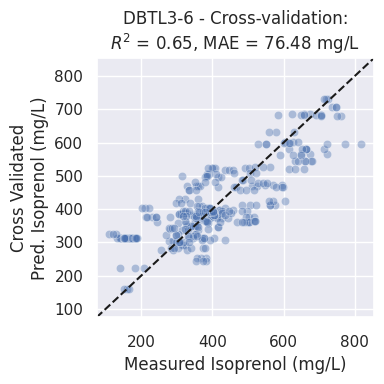

In [34]:
fig1, ax1 = plt.subplots(figsize = (4,4))
add_art_parity_plot(perf_df = dbtl6_art_df, cv = True, title_stat = True, ax = ax1)
fig1.tight_layout()
fig1.savefig('poster_crossval_ART.png', dpi = 600, bbox_inches = None)

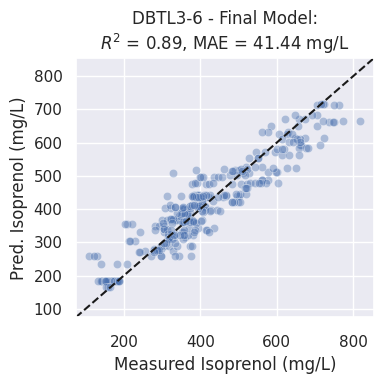

In [35]:
fig2, ax2 = plt.subplots(figsize = (4,4))
add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = True, ax = ax2)
fig2.tight_layout()
fig2.savefig('poster_full_ART.png', dpi = 600, bbox_inches = None)

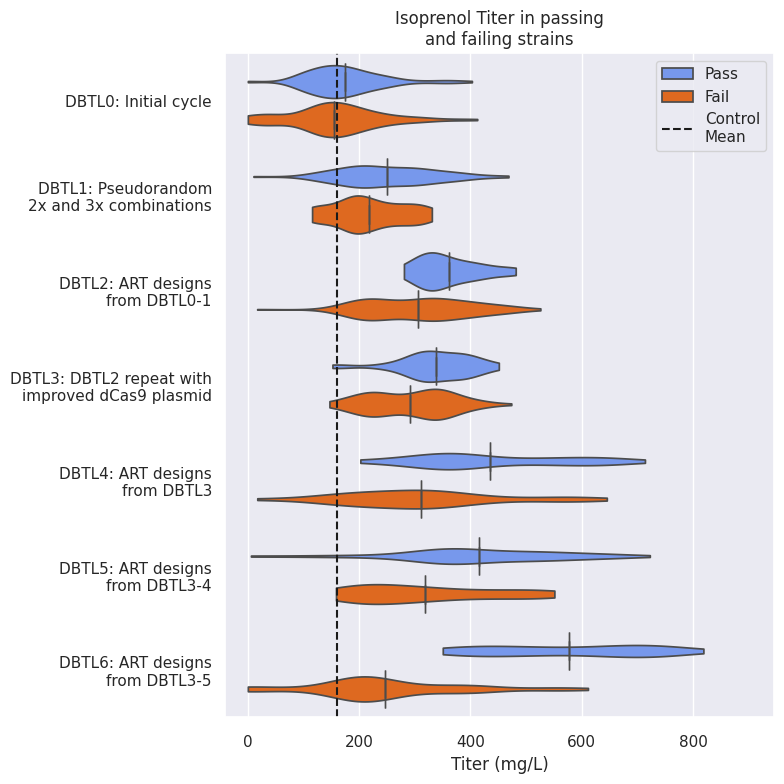

In [36]:
fig3, ax3 = plt.subplots(figsize = (8,8))

add_titer_violin(df, ax3, overlay='mean_only')
fig3.tight_layout()
fig3.savefig('poster_titer_violin.png', dpi = 600, bbox_inches = None)


# Version 2 - 

In [37]:
fig_h = 8
fig_w = 8

schematic_thin = plt.imread('./Figure 3A v2 thin.png')
schematic_thin.shape
scheme_h, scheme_w = schematic_thin.shape[:2]

# scheme_ax_w = 0.2
# scheme_ax_h = scheme_ax_w * fig_w * scheme_h/scheme_w * 1/fig_h

scheme_ax_h = 0.95
scheme_ax_w = scheme_ax_h * fig_h * scheme_w/scheme_h * 1/fig_w

## Bottom row of figures:
fig_bottom = 0.05
fig_left = 0.02
fig_height = 0.95

space_between_figures = 0.2
violin_left = fig_left + scheme_ax_w + space_between_figures
violin_width = 1 - space_between_figures-scheme_ax_w - 0.05

In [38]:
violin_left

0.6432648817260203

In [39]:
violin_width

0.3267351182739798

0.02 1.0
0.6032648817260202 1.02


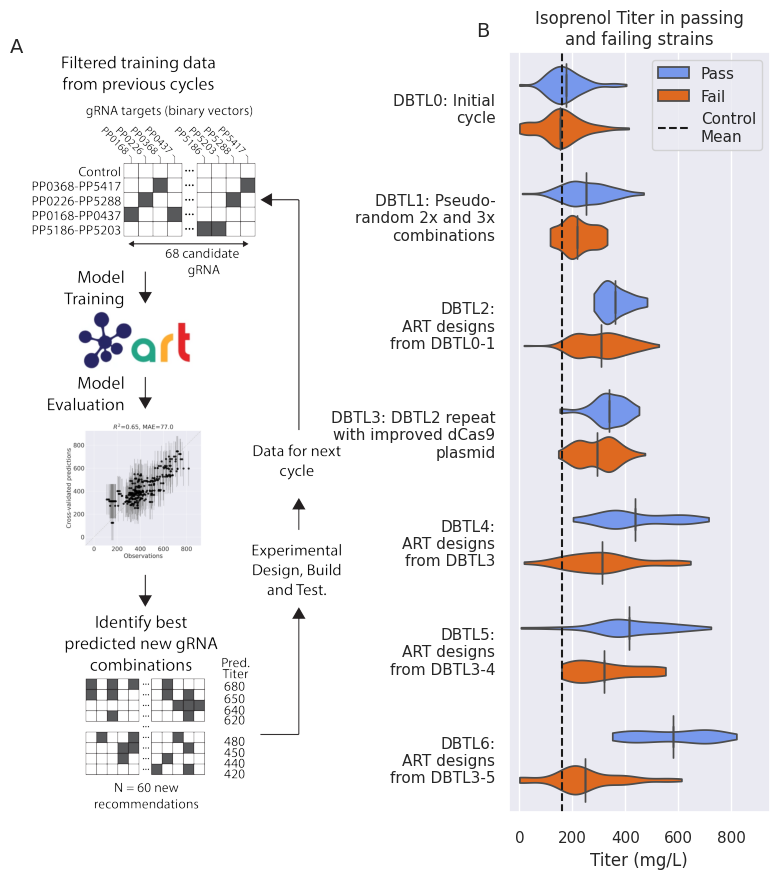

In [40]:
#Create full figure
f = plt.figure(figsize = (fig_w, fig_h))
#Add axis for the schematic
ax_schematic = f.add_axes(
    rect = (fig_left, fig_bottom, scheme_ax_w, scheme_ax_h), #left, bottom, width, height
    frameon = False
)
add_schematic_3A(ax_schematic, image_location = './Figure 3A v2 thin.png')

#Add axes for other figure
ax_titer = f.add_axes(rect=(violin_left, fig_bottom, violin_width, fig_height))


# #Use plotting functions to add content to each axis
#Note: Temporarily update the cycle labels:
df['cycle_label'] = df['cycle'].apply(lambda x: cycle_label_dict_thin[x])
add_titer_violin(df, ax_titer, overlay='mean_only')
df['cycle_label'] = df['cycle'].apply(lambda x: cycle_label_dict[x])
# # add_dcas9_violin(df[df['dCas9_normtocontrol']<4], ax_dcas9)
# add_dcas9_pctbar(df, ax_dcas9)
# add_filter_bargraph(ax_filter)
# add_art_performance_bargraph(art_perf_df_melt, ax_art_bargraph)
# add_art_parity_plot(perf_df = dbtl6_art_df, cv = True, title_stat = True, ax = ax_art_cv_perf)
# add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = True, ax = ax_art_perf)


label_offsets = np.array([-0.04, 0.02])
for a, l in zip(f.get_axes(), 'ABCDEFG'):
    ax_pos = a.get_position().bounds
    if l == 'A':
        offset = [0, 0]
    else:
        offset = label_offsets
    text_x = ax_pos[0] + offset[0]
    text_y = ax_pos[1]+ax_pos[3] + offset[1]
    print(text_x, text_y)
    f.text(text_x, text_y, l, fontsize = 14)
    # ax_upper_left = [ax_pos
                                
f.savefig('FIGURE3_v3_simple.png', bbox_inches=None)
f.savefig('FIGURE3_v3_simple.pdf')
plt.show()

# Version 3 - 

In [60]:
scheme_h

3034

In [61]:
scheme_w

1615

In [62]:
fig_h = 10
fig_w = 8

schematic_thin = plt.imread('./Figure 3A v3 thin.png')
schematic_thin.shape
scheme_h, scheme_w = schematic_thin.shape[:2]

# scheme_ax_w = 0.2
# scheme_ax_h = scheme_ax_w * fig_w * scheme_h/scheme_w * 1/fig_h

scheme_ax_h = 0.4
scheme_ax_w = scheme_ax_h * fig_h * scheme_w/scheme_h * 1/fig_w

## Bottom row of figures:
fig_bottom = 0.05
fig_left = 0.02
fig_height = 0.95

space_between_figures = 0.2
violin_left = fig_left + scheme_ax_w + space_between_figures
violin_width = 1 - space_between_figures-scheme_ax_w - 0.05

In [63]:
violin_left

0.48615029663810155

In [64]:
violin_width

0.48384970336189853

0.02 0.45
0.4461502966381016 1.02


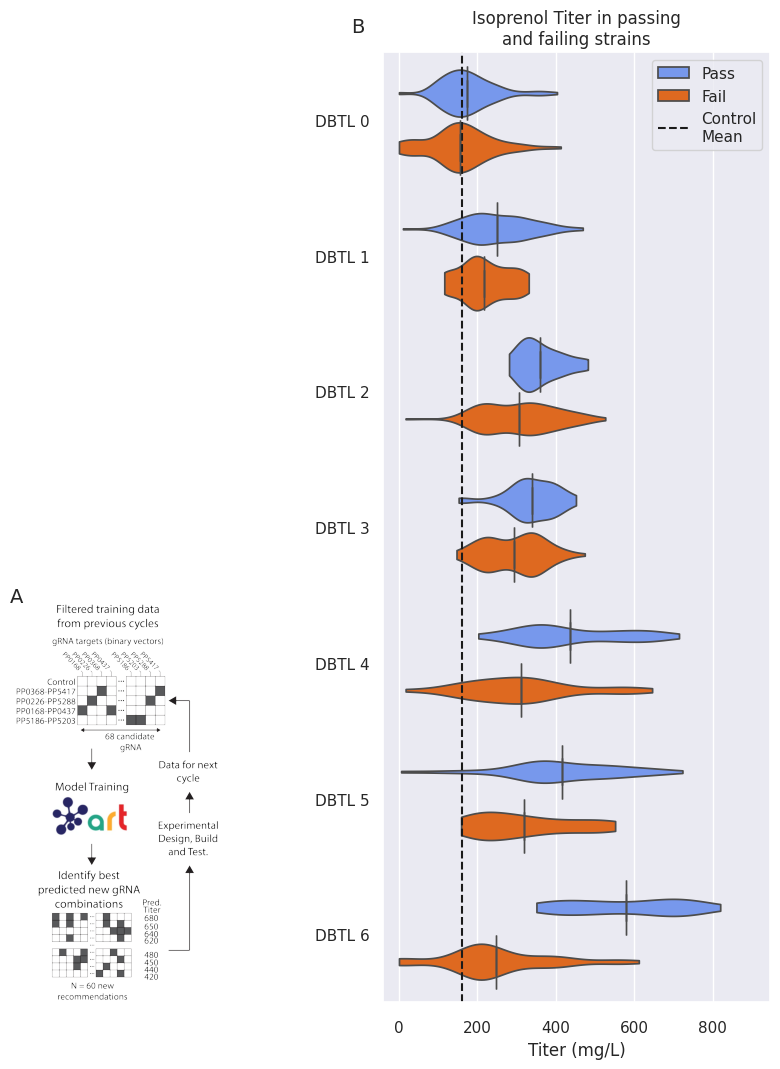

In [65]:
#Create full figure
f = plt.figure(figsize = (fig_w, fig_h))
#Add axis for the schematic
ax_schematic = f.add_axes(
    rect = (fig_left, fig_bottom, scheme_ax_w, scheme_ax_h), #left, bottom, width, height
    frameon = False
)
add_schematic_3A(ax_schematic, image_location = './Figure 3A v3 thin.png')

#Add axes for other figure
ax_titer = f.add_axes(rect=(violin_left, fig_bottom, violin_width, fig_height))


# #Use plotting functions to add content to each axis
#Note: Temporarily update the cycle labels:
df['cycle_label'] = df['cycle'].apply(lambda x: f'DBTL {x}')
add_titer_violin(df, ax_titer, overlay='mean_only')
df['cycle_label'] = df['cycle'].apply(lambda x: cycle_label_dict[x])
# # add_dcas9_violin(df[df['dCas9_normtocontrol']<4], ax_dcas9)
# add_dcas9_pctbar(df, ax_dcas9)
# add_filter_bargraph(ax_filter)
# add_art_performance_bargraph(art_perf_df_melt, ax_art_bargraph)
# add_art_parity_plot(perf_df = dbtl6_art_df, cv = True, title_stat = True, ax = ax_art_cv_perf)
# add_art_parity_plot(perf_df = dbtl6_art_df, cv = False, title_stat = True, ax = ax_art_perf)


label_offsets = np.array([-0.04, 0.02])
for a, l in zip(f.get_axes(), 'ABCDEFG'):
    ax_pos = a.get_position().bounds
    if l == 'A':
        offset = [0, 0]
    else:
        offset = label_offsets
    text_x = ax_pos[0] + offset[0]
    text_y = ax_pos[1]+ax_pos[3] + offset[1]
    print(text_x, text_y)
    f.text(text_x, text_y, l, fontsize = 14)
    # ax_upper_left = [ax_pos
                                
f.savefig('FIGURE3_v4_simple.png', bbox_inches=None)
f.savefig('FIGURE3_v4_simple.pdf')
plt.show()

In [41]:
%pip install ridgeplot


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
import ridgeplot as rp

In [43]:
# import numpy as np
# from ridgeplot import ridgeplot
# from ridgeplot.datasets import load_probly
# import plotly.io as pio
# pio.renderers.default = 'iframe'

# # Load the probly dataset
# df = load_probly()

# # Let's grab the subset of columns used in the example
# column_names = [
#     "Almost Certainly",
#     "Very Good Chance",
#     "We Believe",
#     "Likely",
#     "About Even",
#     "Little Chance",
#     "Chances Are Slight",
#     "Almost No Chance",
# ]
# df = df[column_names]

# # Not only does 'ridgeplot(...)' come configured with sensible defaults
# # but is also fully configurable to your own style and preference!
# fig = ridgeplot(
#     samples=df.to_numpy().T,
#     bandwidth=4,
#     kde_points=np.linspace(-12.5, 112.5, 500),
#     colorscale="viridis",
#     colormode="row-index",
#     opacity=0.6,
#     labels=column_names,
#     spacing=5 / 9,
# )

# # And you can still update and extend the final
# # Plotly Figure using standard Plotly methods
# fig.update_layout(
#     height=560,
#     width=800,
#     font_size=16,
#     plot_bgcolor="white",
#     xaxis_tickvals=[-12.5, 0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5],
#     xaxis_ticktext=["", "0", "", "25", "", "50", "", "75", "", "100", ""],
#     xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
#     yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
#     yaxis_title=dict(text="Assigned Probability (%)", font_size=13),
#     showlegend=False,
# )

# # Show us the work!
# fig.show()

In [44]:
# # Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df2 = pd.DataFrame(dict(x=x, g=g))
# m = df2.g.map(ord)
# df2["x"] += m

# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(df2, row="g", hue="g", aspect=15, height=.5, palette=pal)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "x",
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "x")

# # Set the subplots to overlap
# g.figure.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)

## Plot the median and max strain from each cycle

### Filtered data

In [45]:
median_strain_list = []
best_strain_list = []
for c in df['cycle'].unique():
    print(c)
    dfm = df.loc[
        (df['cycle'] == c) & (df['to_keep_improved']) & ~(df['is_control']),
        ['isoprenol', 'line_name_cycle']
    ].groupby('line_name_cycle').mean().sort_values('isoprenol').reset_index()
    n_passing_strains = len(dfm)
    median_strain_idx = np.ceil((n_passing_strains-1)/2)
    median_strain = dfm.loc[median_strain_idx, 'line_name_cycle']
    best_strain = dfm.loc[n_passing_strains-1, 'line_name_cycle']

    median_strain_list.append(median_strain)
    best_strain_list.append(best_strain)
    
    
        

0
1
2
3
4
5
6


In [46]:
df_summary = df.loc[(df['line_name_cycle'].isin(median_strain_list+best_strain_list)) | (df['is_control']), :].copy()
df_summary.loc[df_summary['line_name_cycle'].isin(median_strain_list), 'category'] = 'Median strain'
df_summary.loc[df_summary['line_name_cycle'].isin(best_strain_list), 'category'] = 'Best strain'
df_summary.loc[df_summary['is_control'], 'category'] = 'Control'


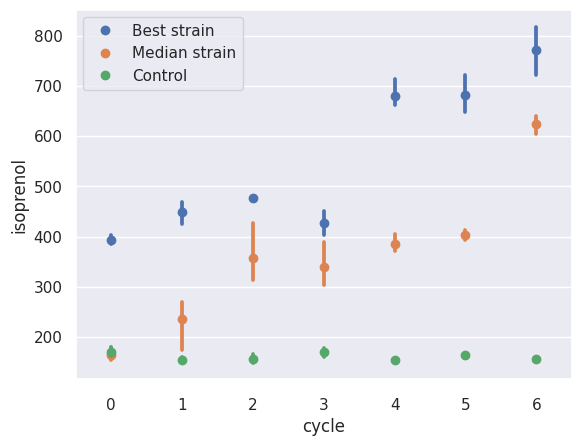

In [47]:
fig, ax = plt.subplots()

sns.pointplot(
    data = df_summary,
    x = 'cycle',
    y = 'isoprenol', 
    hue = 'category', 
    dodge = False,
    # errorbar = None,
    linestyle = 'none',
    # marker = '_', 
    markersize = 5,
    # markeredgewidth = 3,
    hue_order = ['Best strain', 'Median strain', 'Control']
)

# control_mean = df.loc[df['is_control'], 'isoprenol'].mean()
# ax.axhline(control_mean, c = 'k', linestyle = '--', label = 'Control\nMean')
ax.legend()

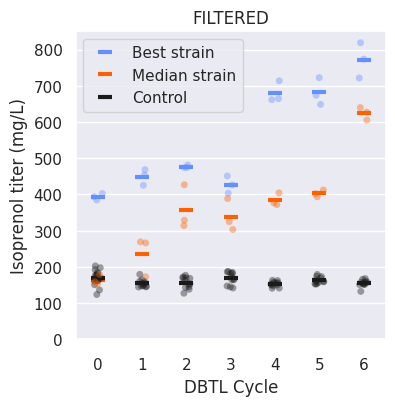

In [48]:
fig, ax = plt.subplots(figsize = (4,4))
sns.stripplot(
    data = df_summary,
    x = 'cycle',
    y = 'isoprenol', 
    hue = 'category', 
    dodge = False,
    alpha = 0.4,
    legend = False,
    palette = palette[:2] + ['k'],
    hue_order = ['Best strain', 'Median strain', 'Control']
)

sns.pointplot(
    data = df_summary,
    x = 'cycle',
    y = 'isoprenol', 
    hue = 'category', 
    dodge = False,
    errorbar = None,
    linestyle = 'none',
    marker = '_', 
    markersize = 10,
    markeredgewidth = 3,
    palette = palette[:2] + ['k'],
    hue_order = ['Best strain', 'Median strain', 'Control']

)


# control_mean = df.loc[df['is_control'], 'isoprenol'].mean()
# ax.axhline(control_mean, c = 'k', linestyle = '--', label = 'Control\nMean')
ax.legend()
ax.set_ylim([0, 850])
ax.set_title('FILTERED')
ax.set_xlabel('DBTL Cycle')
ax.set_ylabel('Isoprenol titer (mg/L)')

fig.savefig('./figures/dbtl_cycle_titer_summary_filtered.png')
fig.savefig('./figures/dbtl_cycle_titer_summary_filtered.pdf')


### unfiltered

In [49]:
median_strain_list = []
best_strain_list = []
for c in df['cycle'].unique():
    print(c)
    dfm = df.loc[
        (df['cycle'] == c) & ~(df['is_control']),
        ['isoprenol', 'line_name_cycle']
    ].groupby('line_name_cycle').mean().sort_values('isoprenol').reset_index()
    n_passing_strains = len(dfm)
    median_strain_idx = np.ceil((n_passing_strains-1)/2)
    median_strain = dfm.loc[median_strain_idx, 'line_name_cycle']
    best_strain = dfm.loc[n_passing_strains-1, 'line_name_cycle']

    median_strain_list.append(median_strain)
    best_strain_list.append(best_strain)
    
    

df_summary = df.loc[(df['line_name_cycle'].isin(median_strain_list+best_strain_list)) | (df['is_control']), :].copy()
df_summary.loc[df_summary['line_name_cycle'].isin(median_strain_list), 'category'] = 'Median strain'
df_summary.loc[df_summary['line_name_cycle'].isin(best_strain_list), 'category'] = 'Best strain'
df_summary.loc[df_summary['is_control'], 'category'] = 'Control'

0
1
2
3
4
5
6


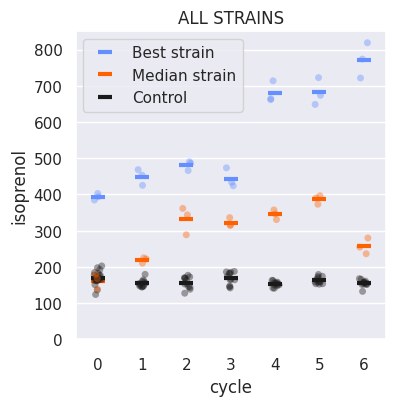

In [50]:
fig, ax = plt.subplots(figsize = (4,4))
sns.stripplot(
    data = df_summary,
    x = 'cycle',
    y = 'isoprenol', 
    hue = 'category', 
    dodge = False,
    alpha = 0.4,
    legend = False,
    palette = palette[:2] + ['k'],
    hue_order = ['Best strain', 'Median strain', 'Control']
)

sns.pointplot(
    data = df_summary,
    x = 'cycle',
    y = 'isoprenol', 
    hue = 'category', 
    dodge = False,
    errorbar = None,
    linestyle = 'none',
    marker = '_', 
    markersize = 10,
    markeredgewidth = 3,
    palette = palette[:2] + ['k'],
    hue_order = ['Best strain', 'Median strain', 'Control']

)


# control_mean = df.loc[df['is_control'], 'isoprenol'].mean()
# ax.axhline(control_mean, c = 'k', linestyle = '--', label = 'Control\nMean')
ax.legend()
ax.set_ylim([0, 850])
ax.set_title('ALL STRAINS')


fig.savefig('./figures/dbtl_cycle_titer_summary_unfiltered.png')
fig.savefig('./figures/dbtl_cycle_titer_summary_unfiltered.pdf')


# sns.stripplot(
#     data=penguins, x="species", y="bill_depth_mm", hue="sex",
#     dodge=True, alpha=.2, legend=False,
# )
# sns.pointplot(
#     data=penguins, x="species", y="bill_depth_mm", hue="sex",
#     dodge=.4, linestyle="none", errorbar=None,
#     marker="_", markersize=20, markeredgewidth=3,
# )

# OLD

In [51]:
df.columns

Index(['Line Name', 'cycle', 'is_control', 'line_name_norep', 'number_of_grna',
       'isoprenol', 'dCas9', 'dCas9_normtocontrol', 'target_1', 'target_2',
       'target_3', 'target_4', 'target_1_value', 'target_2_value',
       'target_3_value', 'target_4_value', 'target_1_control',
       'target_2_control', 'target_3_control', 'target_4_control',
       'target_1_norm', 'target_2_norm', 'target_3_norm', 'target_4_norm',
       'has_missing_control', 'above_dcas9_thresh', 'target_1_belowthresh',
       'target_2_belowthresh', 'target_3_belowthresh', 'target_4_belowthresh',
       'all_targets_belowthresh', 'all_reps_belowthresh',
       'all_reps_above_dcas9_thresh', 'to_keep', 'to_keep_improved',
       'line_name_cycle', 'has_1506', '1506_position', '1506_downreg',
       'cycle_label'],
      dtype='object')

In [52]:
f = {'isoprenol': ['mean', 'std'], 'cycle': 'first'}
df_mean_isoprenol = df[['line_name_cycle', 'isoprenol', 'cycle']].groupby('line_name_cycle').agg(f)
df_mean_isoprenol.columns = df_mean_isoprenol.columns.droplevel()